# **Loan Prediction Project**

# Divyansh Mishra

Here I imported all the libraries and the modules that are required to me during this whole project.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Read_csv func is used to read the csv file.
So, I read my loan_train.csv file and stored it in data as dataframe.

In [2]:
data_train = pd.read_csv('loan_train.csv')

**head()**

Head func gives by default first 5 observation of dataset.

In [3]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**info()**

Info func gives basic information about the dataset.

Below we can find that dataset consists 614 entries and 13 columns with data types int, float and object.

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data_train.size

7982

In [6]:
data_train.shape

(614, 13)

**describe()**

Describe function gives the statistical measure of numeric columns.

Thus we can get count, mean, std, min, quartiles and max values for those columns.

In [7]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# columns

Returns the features of columns


In [8]:
data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Below code will give the unique values of all the features of our dataset.


In [10]:
column_list = data_train.columns.values.tolist()
for column_name in column_list:
    print(column_name,'\n')
    print(data_train[column_name].unique(),'\n')

Loan_ID 

['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP0012

Above we found that Dependents column consists '3+', so we will replace it with 3.


In [11]:
data_train['Dependents'].replace(to_replace='3+', value=3,inplace=True)

Below code will convert the datatype of dependents feature into float


In [12]:
data_train=data_train.astype({'Dependents':float})

# Heatmap

Heatmap used to plot the density of various quantities.

Here we used heatmap provided by seaborn library and plotted the no. of missing values in order to get the fair visual about the density of missing values for various features.

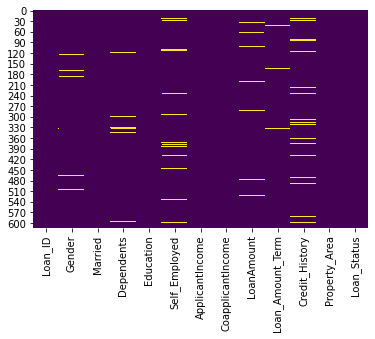

In [13]:
sns.heatmap(data_train.isnull(),cbar=False,cmap="viridis")

**corr()**

corr is used to provide the corelation between various features as how negatively or positively two features are corelated with each other that helps us in analysing the relationships between various features.

In [14]:
data_train.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.118679,0.027259,0.163997,-0.100484,-0.050082
ApplicantIncome,0.118679,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,0.027259,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.163997,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.100484,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.050082,-0.014715,-0.002056,-0.008433,0.001470,1.000000


# Pairplot

Here I plotted the pairplot which gives the visual representation of the distribution of all features.

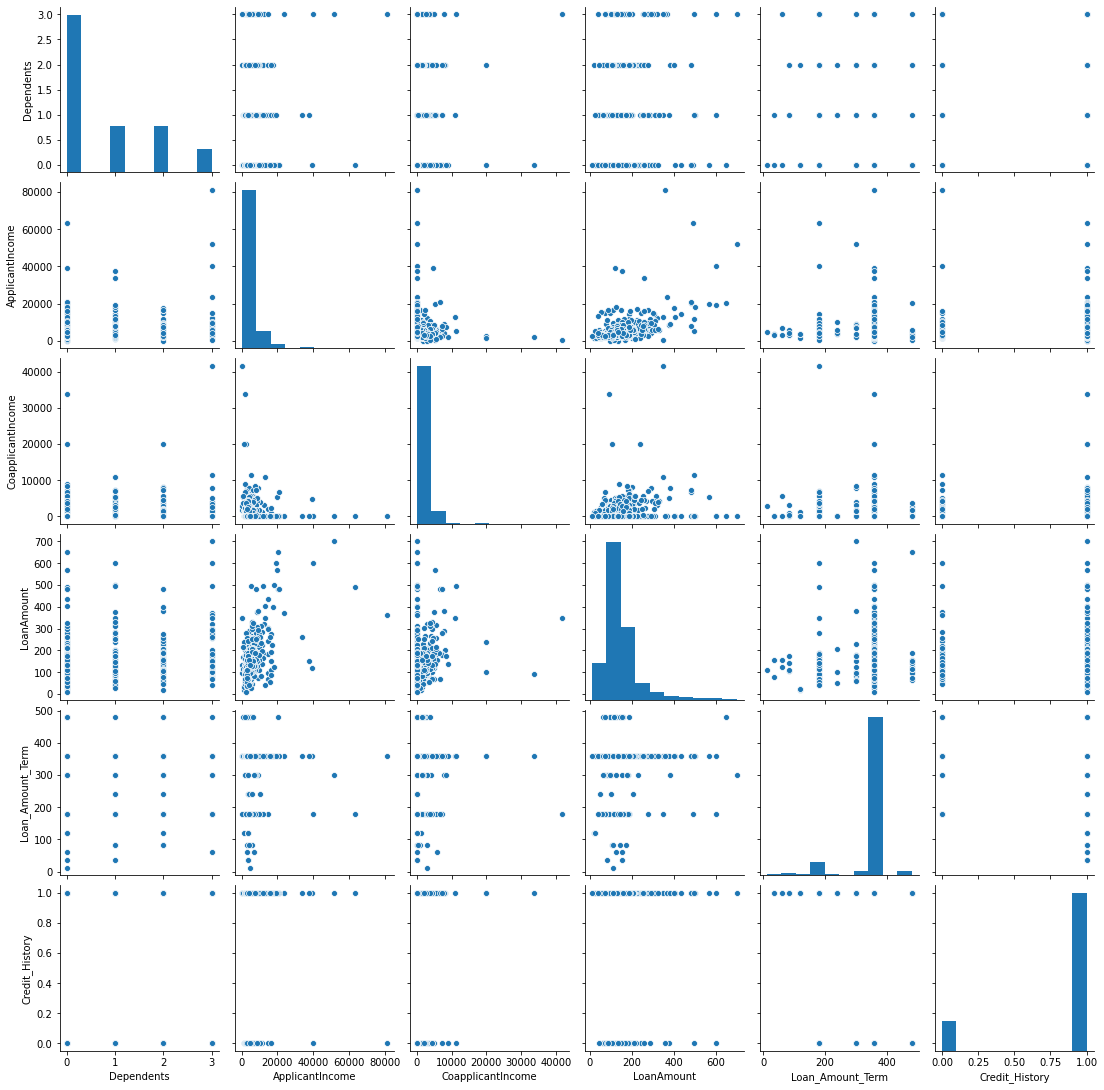

In [15]:
sns.pairplot(data_train)

# Filling The Missing Values

Remember that heatmap above told us about the missing values in various features.

So, here we replaced the missing values for numerical feature by the mean of that feature.

And for categorical features, we reaplced the NAN values with the mode value of that feature. 

In [16]:
data_train['Gender'].replace(to_replace=np.nan, value=data_train['Gender'].mode()[0],inplace=True)

In [17]:
data_train['Loan_Amount_Term'].replace(to_replace=np.nan, value=data_train['Loan_Amount_Term'].mean(),inplace=True)

In [18]:
data_train['Dependents'].replace(to_replace=np.nan, value=data_train['Dependents'].mean(),inplace=True)

In [19]:
data_train['LoanAmount'].replace(to_replace=np.nan, value=data_train['LoanAmount'].mean(),inplace=True)

In [20]:
data_train['Self_Employed'].replace(to_replace=np.nan, value=data_train['Self_Employed'].mode()[0],inplace=True)

In [21]:
data_train['Credit_History'].replace(to_replace=np.nan, value=data_train['Credit_History'].mean(),inplace=True)

In [22]:
data_train['Married'].replace(to_replace=np.nan, value=data_train['Married'].mode()[0],inplace=True)

# CountPlot

Countplot is used to plot the count of unique quantities in a feature.
So, hear I plotted the count of various categorical features, which will give me intuition about the density of various values in that particular feature. 

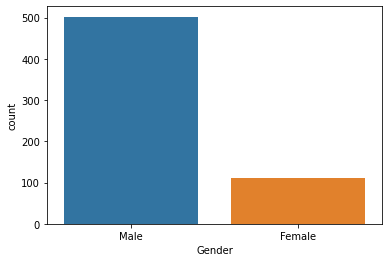

In [23]:
sns.countplot(data_train['Gender'])

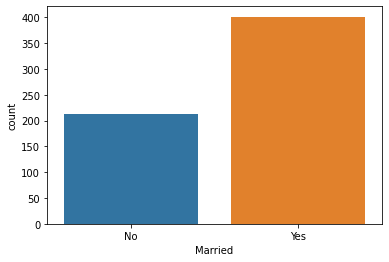

In [24]:
sns.countplot(data_train['Married'])

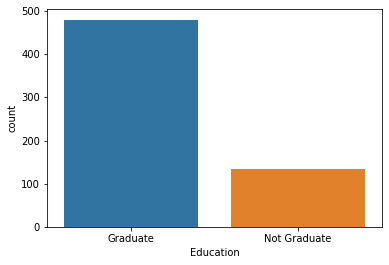

In [25]:
sns.countplot(data_train['Education'])

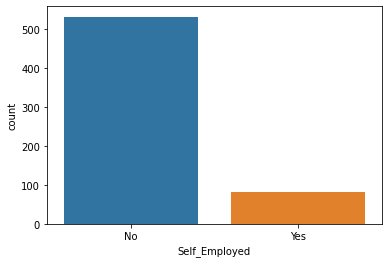

In [26]:
sns.countplot(data_train['Self_Employed'])

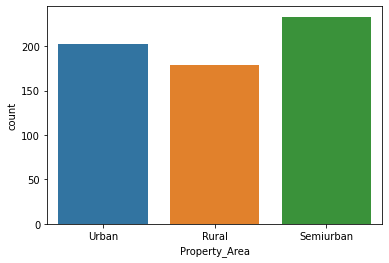

In [27]:
sns.countplot(data_train['Property_Area'])

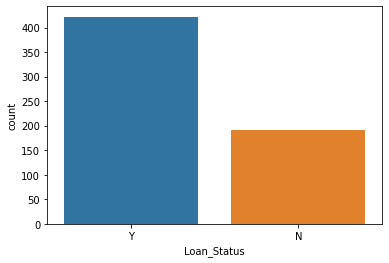

In [28]:
sns.countplot(data_train['Loan_Status'])

# LabelEncoder

Here I used the LabelEncoder provided by the sklearn which will encode the object values our features into the distinct numeric values. 

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()

In [31]:
data_train['Gender']=le.fit_transform(data_train['Gender'])

In [32]:
data_train['Married']=le.fit_transform(data_train['Married'])
data_train['Education']=le.fit_transform(data_train['Education'])
data_train['Self_Employed']=le.fit_transform(data_train['Self_Employed'])
data_train['Property_Area']=le.fit_transform(data_train['Property_Area'])
data_train['Loan_Status']=le.fit_transform(data_train['Loan_Status'])

Here using isnull(), I check if there is any missing value in my dataset which I found that there is not any missing values left in my dataset after replacing them with mode and median.

In [33]:
data_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# tail()

tail by default returns the last five observations of dataset.

In [34]:
data_train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3.0,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1.0,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2.0,0,0,7583,0.0,187.0,360.0,1.0,2,1
613,LP002990,0,0,0.0,0,1,4583,0.0,133.0,360.0,0.0,1,0


## Corelation Heatmap

After doing all the initial cleaning of data now my dataset is ready for training, so before modeling the dataset I would like to observe the relationship between the various feature of our final cleaned dataset so I plotted the heatmap of corelation matrix.

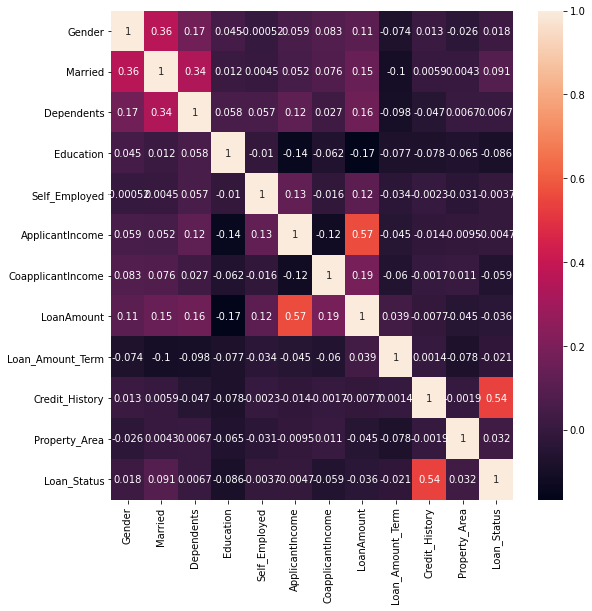

In [35]:
plt.figure(figsize=(9,9))
sns.heatmap(data_train.corr(),annot=True)

And finally I plotted the pairplot of my cleaned dataset. 

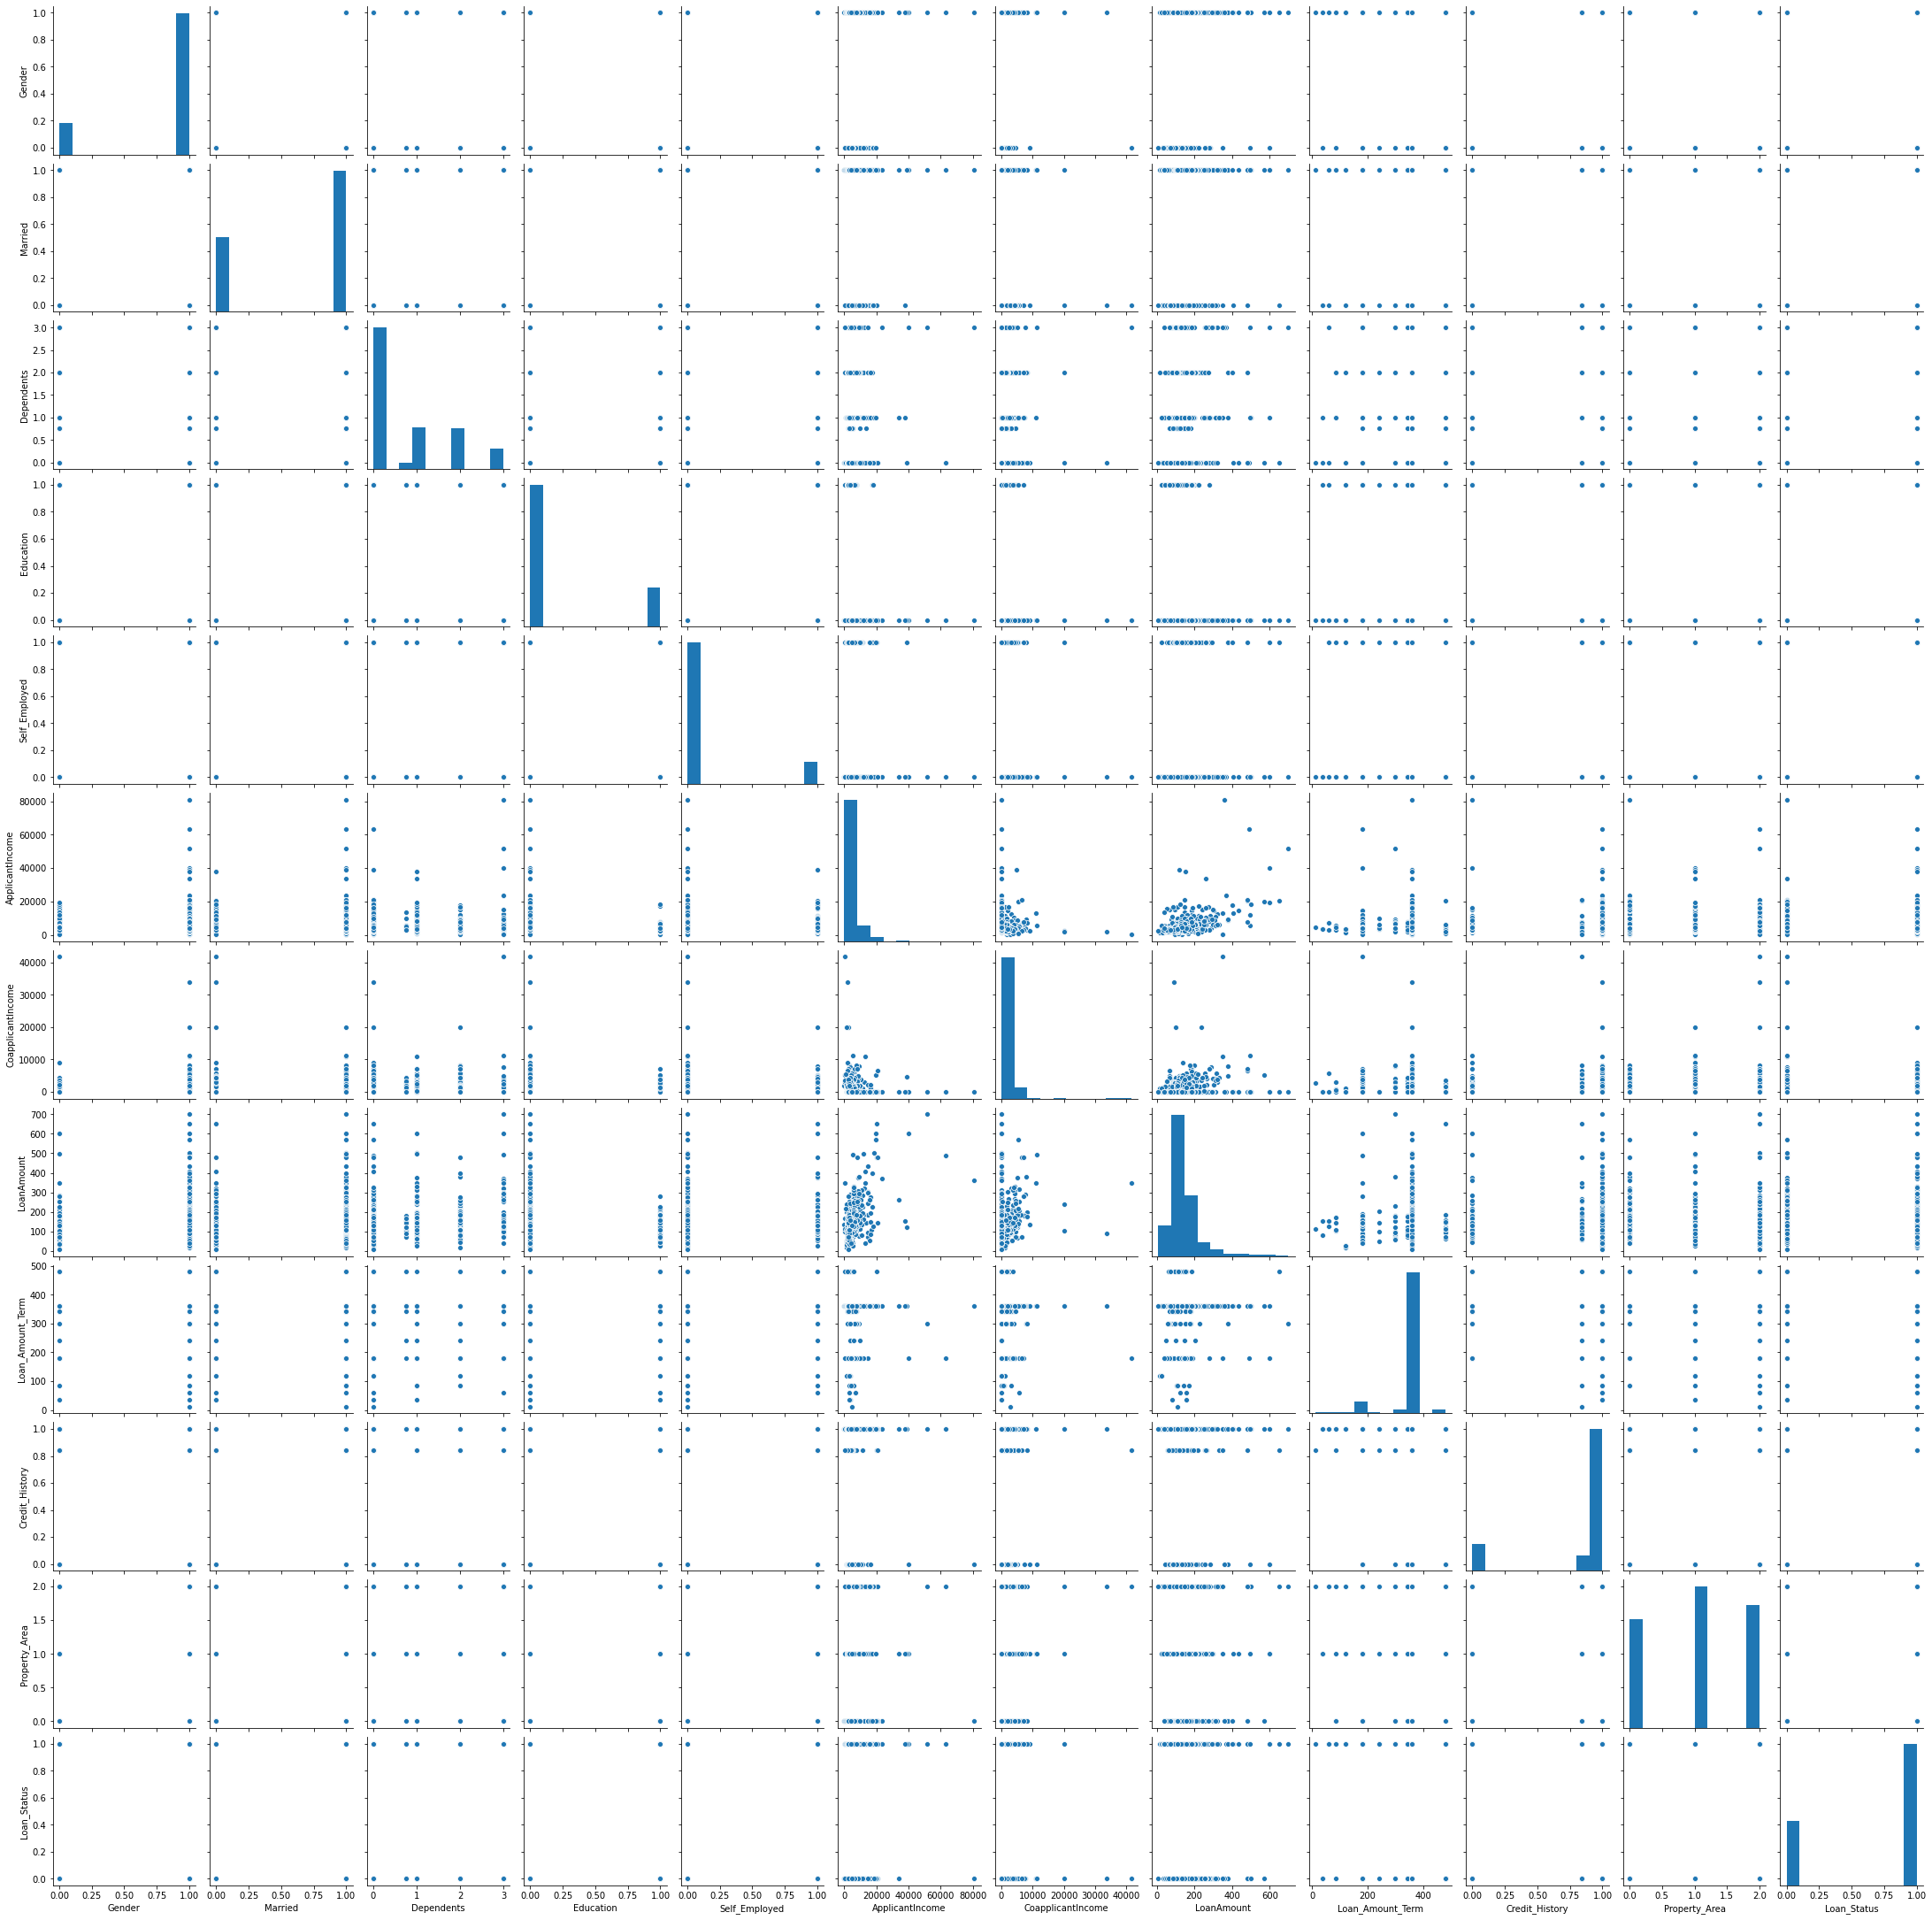

In [36]:
sns.pairplot(data_train)

In [37]:
X=data_train.drop(['Loan_Status','Loan_ID'],axis=1)

In [38]:
y=data_train['Loan_Status']

In [39]:
X.shape

(614, 11)

In [57]:
y.shape

(614,)

In [64]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### RandomForest

In [66]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:

predi=model.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(predi,y_test)

0.7881773399014779

In [69]:
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix\n',confusion_matrix(y_test,predi))
print('Classification Report\n',classification_report(y_test,predi))

Confusion Matrix
 [[ 36  36]
 [  7 124]]
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.50      0.63        72
           1       0.78      0.95      0.85       131

    accuracy                           0.79       203
   macro avg       0.81      0.72      0.74       203
weighted avg       0.80      0.79      0.77       203



### KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn =KNeighborsClassifier(n_neighbors=3)

In [82]:

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [83]:
y_pred=knn.predict(X_test)

In [84]:

print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
print("Classification report\n",classification_report(y_test,y_pred))
print("Accuracy score",accuracy_score(y_test,y_pred))

Confusion matrix
 [[ 36  36]
 [  6 125]]
Classification report
               precision    recall  f1-score   support

           0       0.86      0.50      0.63        72
           1       0.78      0.95      0.86       131

    accuracy                           0.79       203
   macro avg       0.82      0.73      0.74       203
weighted avg       0.81      0.79      0.78       203

Accuracy score 0.7931034482758621


In [85]:
error_rate=[]

In [86]:
 for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

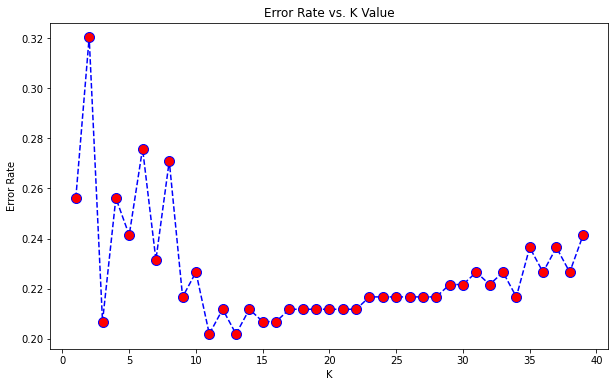

In [87]:

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [88]:
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=13')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))


WITH K=13


[[ 33  39]
 [  2 129]]


              precision    recall  f1-score   support

           0       0.94      0.46      0.62        72
           1       0.77      0.98      0.86       131

    accuracy                           0.80       203
   macro avg       0.86      0.72      0.74       203
weighted avg       0.83      0.80      0.78       203



0.7980295566502463


### NeuralNetwork

In [100]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [101]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [102]:
early_stop = EarlyStopping(monitor='val_loss', patience= 4, verbose= 0, mode = 'min')

In [103]:
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs= 20, validation_data=(X_test, y_test), callbacks= [early_stop])

Epoch 1/20
13/13 [==============================] - 0s 17ms/step - loss: 0.6899 - accuracy: 0.6326 - val_loss: 0.6628 - val_accuracy: 0.6453
Epoch 2/20
13/13 [==============================] - 0s 4ms/step - loss: 0.6748 - accuracy: 0.6910 - val_loss: 0.6419 - val_accuracy: 0.6453
Epoch 3/20
13/13 [==============================] - 0s 4ms/step - loss: 0.6350 - accuracy: 0.6959 - val_loss: 0.6274 - val_accuracy: 0.6453
Epoch 4/20
13/13 [==============================] - 0s 4ms/step - loss: 0.6343 - accuracy: 0.7080 - val_loss: 0.6106 - val_accuracy: 0.6700
Epoch 5/20
13/13 [==============================] - 0s 4ms/step - loss: 0.6144 - accuracy: 0.7202 - val_loss: 0.5934 - val_accuracy: 0.7241
Epoch 6/20
13/13 [==============================] - 0s 4ms/step - loss: 0.6162 - accuracy: 0.7299 - val_loss: 0.5796 - val_accuracy: 0.7635
Epoch 7/20
13/13 [==============================] - 0s 4ms/step - loss: 0.5807 - accuracy: 0.7348 - val_loss: 0.5610 - val_accuracy: 0.7931
Epoch 8/20
13/13 [=

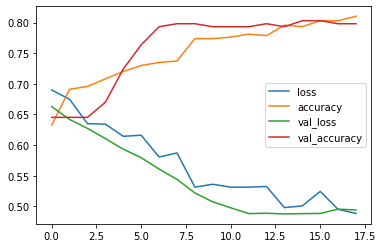

In [104]:

loss = pd.DataFrame(model.history.history)
loss.plot()

### SVM

In [89]:
from sklearn.svm import SVC

In [91]:
svc_model = SVC()

In [92]:
svc_model.fit(X_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [93]:
y_predictions= svc_model.predict(X_test)

In [94]:
print("Confusion Matrix\n",confusion_matrix(y_test,y_predictions))
print("Classification Report\n",classification_report(y_test,y_predictions))
print("Accuracy Score",accuracy_score(y_test,y_predictions))

Confusion Matrix
 [[ 33  39]
 [  2 129]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.46      0.62        72
           1       0.77      0.98      0.86       131

    accuracy                           0.80       203
   macro avg       0.86      0.72      0.74       203
weighted avg       0.83      0.80      0.78       203

Accuracy Score 0.7980295566502463


### DecisionTree

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
dtree  = DecisionTreeClassifier()

In [97]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [98]:
predictions = dtree.predict(X_test)

In [99]:
print("Confusion matrix\n",confusion_matrix(y_test,predictions))
print("Classification report\n",classification_report(y_test,predictions))
print("Accuracy score",accuracy_score(y_test,predictions))

Confusion matrix
 [[ 32  40]
 [ 29 102]]
Classification report
               precision    recall  f1-score   support

           0       0.52      0.44      0.48        72
           1       0.72      0.78      0.75       131

    accuracy                           0.66       203
   macro avg       0.62      0.61      0.61       203
weighted avg       0.65      0.66      0.65       203

Accuracy score 0.6600985221674877
